In [1]:
import pandas as pd 
df = pd.read_csv("HousingData.csv")
df.head()
df.isnull().sum()
df = df.fillna(df.mean())
df.shape



(506, 14)

In [2]:
df.shape

(506, 14)

In [3]:
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns != 'MEDV']
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()

# Add the first hidden layer with 128 neurons, input dimension of 13 (as there are 13 features), 
# 'normal' kernel initializer, and ReLU activation function
model.add(Dense(128, input_dim=13, kernel_initializer='normal', activation='relu'))

# Add the second hidden layer with 64 neurons and ReLU activation function
model.add(Dense(64, activation='relu'))

# Add the output layer with 1 neuron and linear activation function
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=["mae"])

# Print a summary of the model
model.summary()


C:\Users\rhutu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(x_train,y_train,epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 637.6207 - mae: 23.2694 - val_loss: 575.9638 - val_mae: 22.5001
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 650.8821 - mae: 23.4298 - val_loss: 558.9017 - val_mae: 22.1092
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 572.2313 - mae: 21.9545 - val_loss: 534.2917 - val_mae: 21.5306
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 550.4940 - mae: 21.4497 - val_loss: 499.0244 - val_mae: 20.6748
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 499.1258 - mae: 20.2362 - val_loss: 451.4250 - val_mae: 19.4558
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 471.1010 - mae: 19.3022 - val_loss: 390.9316 - val_mae: 17.7766
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 400.9854 - mae: 17.4757 - val_loss: 319.9287 - val_mae: 15.7101
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 330.0706 - mae: 15.1694 - val_loss: 244.8842 - val_mae: 13.1422
Epoch 9/100
6/6 ━━━━━━━━━━━━━

In [7]:
mse_value, mae_value = model.evaluate(x_test, y_test, verbose=0)


In [8]:
y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [9]:
import matplotlib.pyplot as plt

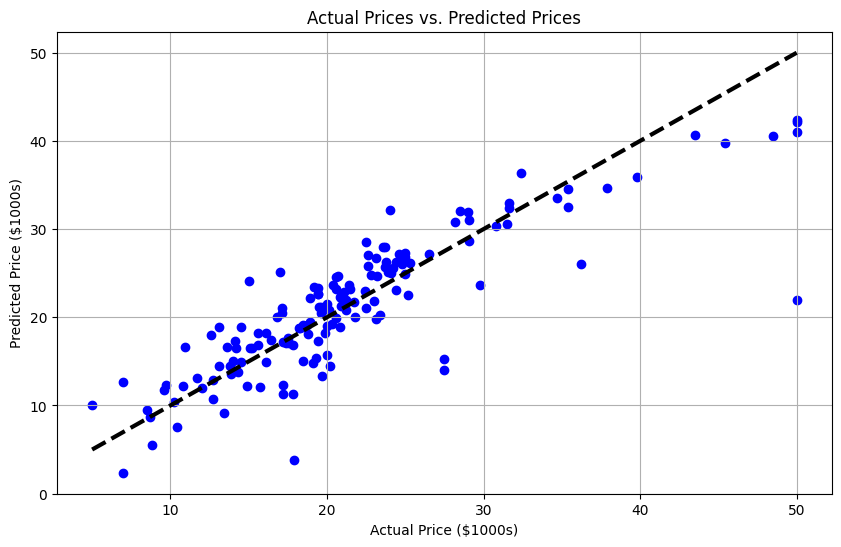

In [10]:
import matplotlib.pyplot as plt

# Plotting the actual prices against the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title('Actual Prices vs. Predicted Prices')
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)



Mean Absolute Error:  2.9940203412583
Mean Squared Error:  19.827432877358024
